# Exercise Classification

## MNIST Data


In [5]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
np.shape(X)

(70000, 784)

In [42]:
X[0,0]==0

True

### E1.1: split data init train and test sets 
use (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [43]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.25, random_state= 42)

(array([    0,     0,     0, ..., 52499, 52499, 52499]),
 array([123, 124, 125, ..., 654, 655, 656]))

### E1.2: normalize data
use (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)

In [84]:
from sklearn.preprocessing import Normalizer
transformer= Normalizer(norm='l2').fit(train_X)
X_train_norm=transformer.transform(train_X)
X_test_norm=transformer.transform(test_X)

### E1.3: plot some data samples 
use (https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

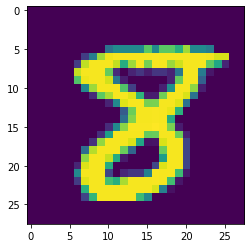

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
res=test_X[0,:].reshape((28,28))
plt.imshow(res)
# hint: need to reshape 1d vector to orig 2d shape: np.reshape( VECTOR,(28,28))

## Random Forest Classification

### E1.4: train a Random Forest Classifier on the data
use (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [90]:
from sklearn.ensemble import RandomForestClassifier
c=RandomForestClassifier(n_estimators=100, n_jobs=4)
c.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

### E1.5: evaluate three models with differt number of trees: 10, 100, 500
calculate and compare
* accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
* F-Measure (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)


In [92]:
pred=c.predict(test_X)

In [79]:
pred[0]

'8'

In [93]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(test_Y, pred)
acc

0.9671428571428572

In [94]:
from sklearn.metrics import f1_score
f1=f1_score(test_Y, pred, average='micro')
f1

0.9671428571428572